# Import  and Extract the downloaded zip file

In [1]:
from zipfile import ZipFile as ZF
dataset = "archive.zip"

with ZF(dataset,'r') as zip:
  zip.extractall()

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

* Import Training Dataset with encoding of ISO-8859-1 as utf-8 is not working. We can use latin or latin-1

In [3]:
tweet_dataset = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1")
tweet_dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
tweet_dataset.shape

(1599999, 6)

* As the dataset having total 16mil tweets as 1 tweet is count as header, we need to add the headrs or column names and read it again

In [5]:
column_names = ['tgt','id','date_time','query','user','tweet']
tweet_dataset = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1",names=column_names)
tweet_dataset.head()

,tgt,id,date_time,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
tweet_dataset.shape

(1600000, 6)

In [7]:
tweet_dataset.isnull().sum()

tgt          0
id           0
date_time    0
query        0
user         0
tweet        0
dtype: int64

* Dataset having no null values.

In [8]:
tweet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   tgt        1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date_time  1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
tweet_dataset.tgt.value_counts()

0    800000
4    800000
Name: tgt, dtype: int64

As we know
0=>negative
2=>neutral
4=>positive
from the description of website.
and we have only 0 & 4 which is 8mil each.
which shows the dataset is balanced

<Axes: xlabel='tgt', ylabel='count'>

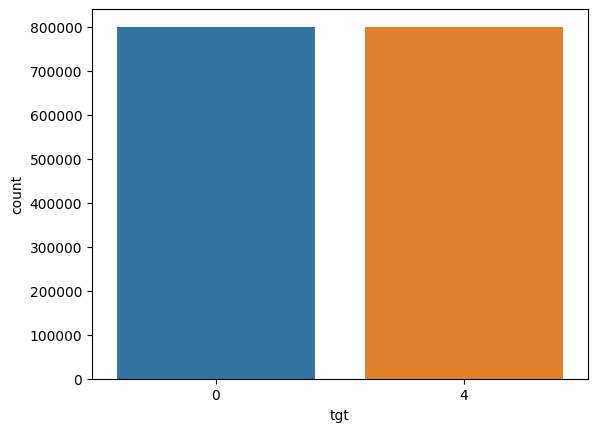

In [10]:
sns.countplot(x='tgt', data=tweet_dataset)

In [11]:
# Let's convert the 4 value to 1 so the 0: negative & 1: negative
tweet_dataset.tgt.replace(to_replace=4,value=1,inplace=True)

In [12]:
tweet_dataset.tgt.value_counts()

0    800000
1    800000
Name: tgt, dtype: int64

# Converting all tweets to lower case

In [13]:
tweet_dataset['stem_tweet']=tweet_dataset['tweet'].str.lower()
tweet_dataset['stem_tweet'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: stem_tweet, dtype: object

In [14]:
tweet_dataset['stem_tweet'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: stem_tweet, dtype: object

# Removing all the Stopwords from the tweets

In [15]:
from nltk.corpus import stopwords # This will require to remove the stopwords
from nltk.stem.porter import PorterStemmer # The will require to stem the words

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91776\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
STOPWORDS = stopwords.words('english')
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
tweet_dataset['stem_tweet'] = tweet_dataset['stem_tweet'].apply(lambda text: cleaning_stopwords(text))
tweet_dataset['stem_tweet'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: stem_tweet, dtype: object

In [19]:
tweet_dataset['stem_tweet'].tail()

1599995                    woke up. school best feeling ever
1599996    thewdb.com - cool hear old walt interviews! â...
1599997                     ready mojo makeover? ask details
1599998    happy 38th birthday boo alll time!!! tupac ama...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: stem_tweet, dtype: object

# Removing all the URLs

In [20]:
# This will remove all the URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
tweet_dataset['stem_tweet'] = tweet_dataset['stem_tweet'].apply(lambda x: cleaning_URLs(x))
tweet_dataset['stem_tweet'].head()

0    @switchfoot  s bummer. shoulda got david carr ...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: stem_tweet, dtype: object

# Cleaning all the Numbers

In [21]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweet_dataset['stem_tweet'] = tweet_dataset['stem_tweet'].apply(lambda x: cleaning_numbers(x))
tweet_dataset['stem_tweet'].tail()

1599995                    woke up. school best feeling ever
1599996    thewdb.com - cool hear old walt interviews! â«  
1599997                     ready mojo makeover? ask details
1599998    happy th birthday boo alll time!!! tupac amaru...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: stem_tweet, dtype: object

# Removing all the Mentions & Hastags

In [22]:
# This will remove all the mentions and Hastags
def cleaning_mentions(data):
    return re.sub(r'[@#]\w+', '', data)
tweet_dataset['stem_tweet'] = tweet_dataset['stem_tweet'].apply(lambda x: cleaning_mentions(x))
tweet_dataset['stem_tweet'].tail()

1599995                    woke up. school best feeling ever
1599996    thewdb.com - cool hear old walt interviews! â«  
1599997                     ready mojo makeover? ask details
1599998    happy th birthday boo alll time!!! tupac amaru...
1599999                                            happy    
Name: stem_tweet, dtype: object

# Tokenize all tweets

In [23]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tweet_dataset['stem_tweet'] = tweet_dataset['stem_tweet'].apply(tokenizer.tokenize)
tweet_dataset['stem_tweet'].head()

0    [s, bummer, shoulda, got, david, carr, third, ...
1    [upset, can, t, update, facebook, texting, it,...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4    [no, behaving, all, i, m, mad, here, can, t, s...
Name: stem_tweet, dtype: object

# Stemming all tweets 

In [24]:
from nltk import PorterStemmer
st = PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
tweet_dataset['stem_tweet']= tweet_dataset['stem_tweet'].apply(lambda x: stemming_on_text(x))
tweet_dataset['stem_tweet'].head()

0    [s, bummer, shoulda, got, david, carr, third, ...
1    [upset, can, t, update, facebook, texting, it,...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4    [no, behaving, all, i, m, mad, here, can, t, s...
Name: stem_tweet, dtype: object

# Lemmatize all tweets 

In [25]:
from nltk import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91776\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91776\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweet_dataset['stem_tweet'] = tweet_dataset['stem_tweet'].apply(lambda x: lemmatizer_on_text(x))
tweet_dataset['stem_tweet'].head()

0    [s, bummer, shoulda, got, david, carr, third, ...
1    [upset, can, t, update, facebook, texting, it,...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4    [no, behaving, all, i, m, mad, here, can, t, s...
Name: stem_tweet, dtype: object

In [27]:
tweet_dataset.head()

,tgt,id,date_time,query,user,tweet,stem_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[s, bummer, shoulda, got, david, carr, third, ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, can, t, update, facebook, texting, it,..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[dived, many, times, ball, managed, save, rest..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[no, behaving, all, i, m, mad, here, can, t, s..."


# Separating the dataset to x & y 

In [28]:
X=tweet_dataset.stem_tweet
y=tweet_dataset.tgt

In [29]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


# Creating WordCloud 

In [30]:
from wordcloud import WordCloud

## Negative tweets word cloud

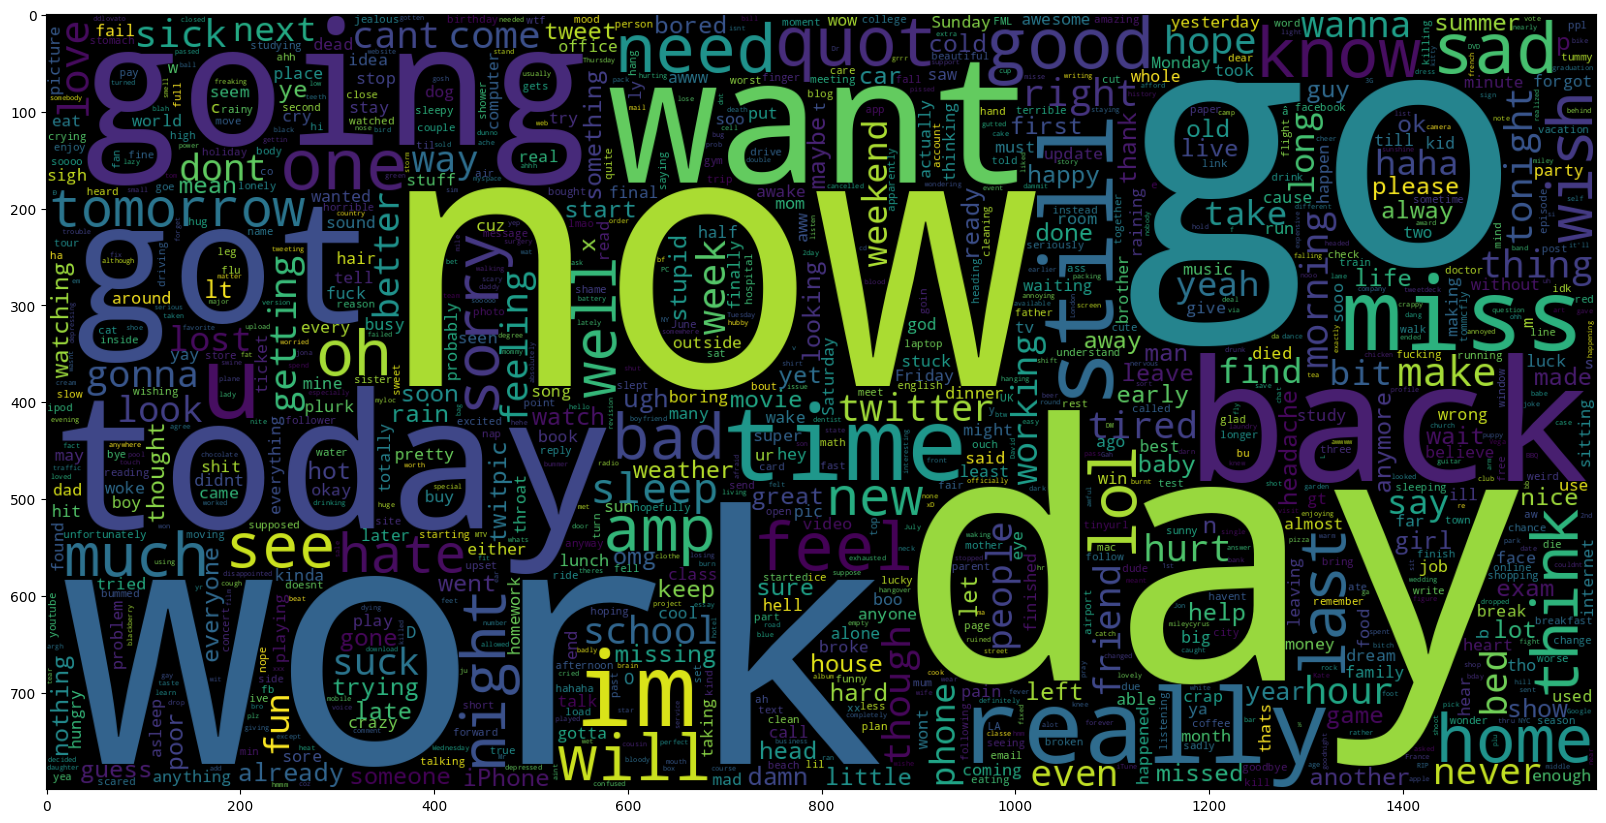

In [31]:
data_neg = tweet_dataset['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## Positive tweets word cloud

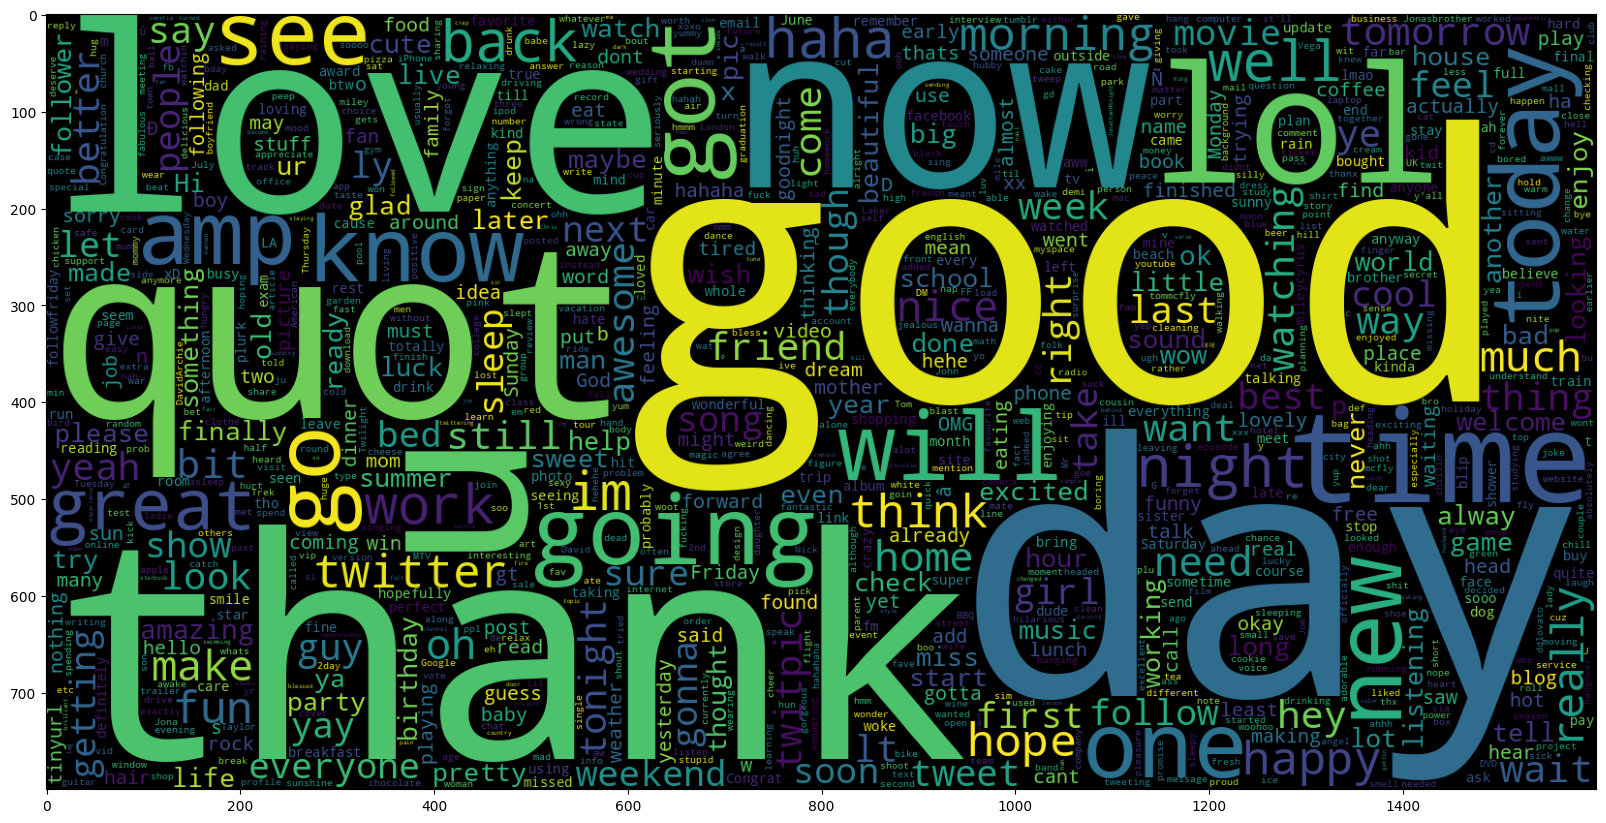

In [32]:
data_pos = tweet_dataset['tweet'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

* Now we will require only 2 columns i.e. tgt and stem_txt to work on

In [33]:
from sklearn.model_selection import train_test_split

# Joining all tweets to single string from list

In [34]:
x = tweet_dataset['stem_tweet'].apply(lambda x: ' '.join(x)) # join the list of words back into a single string
y = tweet_dataset['tgt']

# Splitting the dataset to train & test

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [36]:
print("The size of x Train data: ",x_train.shape)
print("The size of x Test data: ",x_test.shape)
print("The size of y Train data: ", y_train.shape)
print("The size of y Test data: ", y_test.shape)

The size of x Train data:  (1280000,)
The size of x Test data:  (320000,)
The size of y Train data:  (1280000,)
The size of y Test data:  (320000,)


* Now we need to convert tweet data into numerical so that we can analise the sentiment

# Vectorize the tweets or x data to convert all in numerical form

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [41]:
X_train = tfidf.fit_transform(x_train)
X_test = tfidf.transform(x_test)

In [42]:
print(X_train)

  (0, 227036)	0.4333797831237622
  (0, 115645)	0.4068089567840068
  (0, 56157)	0.40257552355084014
  (0, 100379)	0.5134690969919194
  (0, 174017)	0.3447415503128137
  (0, 222944)	0.3195686687081456
  (1, 96686)	1.0
  (2, 137885)	0.15798091190148283
  (2, 69085)	0.19427084382816495
  (2, 79932)	0.17672652069204198
  (2, 96012)	0.15344889139393858
  (2, 206073)	0.14702249877267212
  (2, 128555)	0.22981646438757947
  (2, 227258)	0.38948759475345707
  (2, 39412)	0.2955069957048613
  (2, 220747)	0.3105748811109681
  (2, 204614)	0.31604337259101606
  (2, 67194)	0.2767006303987492
  (2, 204987)	0.17574511675611496
  (2, 63599)	0.18372271842407145
  (2, 56157)	0.48116739246669565
  (3, 93608)	0.413340433509962
  (3, 207141)	0.25552342467335193
  (3, 196356)	0.3724063264659241
  (3, 29073)	0.48983920191900626
  :	:
  (1279996, 154145)	0.2630998924306958
  (1279996, 116504)	0.2601760982966369
  (1279996, 138839)	0.1991498516977773
  (1279996, 207663)	0.20848491663938332
  (1279997, 57943)	0.7547

* Let's train the model using Logistic Regression

# Creating Model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression(max_iter=1000)

In [45]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Prediction on train data 

In [46]:
x_train_pred = model.predict(X_train)

In [47]:
# Check accuracy of the trained dataset
from sklearn.metrics import accuracy_score,confusion_matrix
train_acc = accuracy_score(x_train_pred,y_train)

In [48]:
print("Trained model accuracy on predicted data: ",train_acc*100)

Trained model accuracy on predicted data:  80.16671875


##  Prediction on test data

In [49]:
x_test_pred = model.predict(X_test)
test_acc = accuracy_score(x_test_pred,y_test)

In [50]:
print("Test model accuracy on predicted data: ",test_acc*100)

Test model accuracy on predicted data:  78.1790625


In [51]:
from sklearn.metrics import classification_report

In [52]:
confusion_matrix(y_test,x_test_pred)

array([[121827,  38173],
       [ 31654, 128346]], dtype=int64)

In [53]:
print(classification_report(y_test,x_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    160000
           1       0.77      0.80      0.79    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [54]:
confusion_matrix(x_train_pred,y_train)

array([[500023, 113889],
       [139977, 526111]], dtype=int64)

In [55]:
print(classification_report(x_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80    613912
           1       0.82      0.79      0.81    666088

    accuracy                           0.80   1280000
   macro avg       0.80      0.80      0.80   1280000
weighted avg       0.80      0.80      0.80   1280000



# Plotting ROC Curve

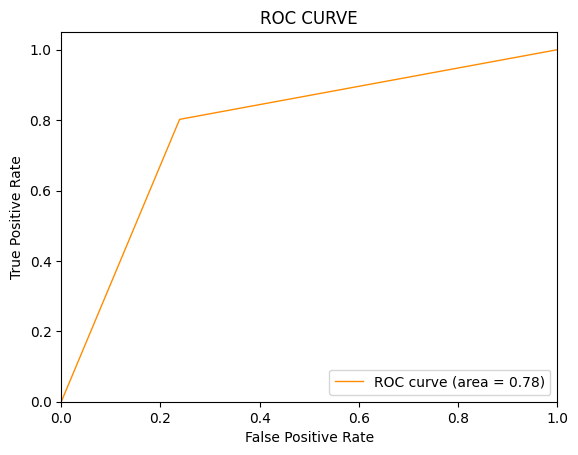

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, x_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# We can test the test file from dataset but we need to again tokenize and clean the data as we can see below

In [57]:
data = pd.read_csv("testdata.manual.2009.06.14.csv",encoding="latin",header=None)

In [58]:
data.head()

,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [59]:
test_tweet = data[5][1]
test_tweet

'Reading my kindle2...  Love it... Lee childs is good read.'

# Saving the model

In [60]:
import pickle

In [61]:
filename = "Twitter_sentiment_model.pkl"
pickle.dump(model,open(filename,'wb'))

In [62]:
loaded_model=pickle.load(open('Twitter_sentiment_model.pkl','rb'))

In [63]:
x_new=X_test[200]
prediction=loaded_model.predict(x_new)
print(prediction)

if (prediction[0]==0):
  print('The Tweet is Negative')
else:
  print('The Tweet is Positive')

[1]
The Tweet is Positive


In [64]:
x_new=X_test[3]
prediction=loaded_model.predict(x_new)
print(prediction)

if (prediction[0]==0):
  print('The Tweet is Negative')
else:
  print('The Tweet is Positive')

[0]
The Tweet is Negative
